### Dataset & EDA

In [1]:
import pandas as pd

In [2]:
true = pd.read_csv('TRUEFIND.csv')

In [3]:
true.head(3)

,id,Statement,Label
0,2,"WHO praises India's Aarogya Setu app, says it ...",True
1,3,"In Delhi, Deputy US Secretary of State Stephen...",True
2,4,LAC tensions: China's strategy behind delibera...,True


In [6]:
fake = pd.read_csv('FAKEIFND.csv')

In [7]:
fake.head(3)

,id,Statement,Label
0,2,Fact Check: 1938 video of BKS Iyengar shared a...,Fake
1,3,Fact Check: Conspiracy theory claims Sushant w...,Fake
2,4,Fact Check: Gujarat’s Rani ki Vav shared as pa...,Fake


In [8]:
true.shape

(37800, 4)

In [9]:
fake.shape

(18914, 3)

In [10]:
true['label'] = 1

In [11]:
true.head(3)

,id,Statement,Label,label
0,2,"WHO praises India's Aarogya Setu app, says it ...",True,1
1,3,"In Delhi, Deputy US Secretary of State Stephen...",True,1
2,4,LAC tensions: China's strategy behind delibera...,True,1


In [12]:
fake['label'] = 0

In [13]:
fake.head(3)

,id,Statement,Label,label
0,2,Fact Check: 1938 video of BKS Iyengar shared a...,Fake,0
1,3,Fact Check: Conspiracy theory claims Sushant w...,Fake,0
2,4,Fact Check: Gujarat’s Rani ki Vav shared as pa...,Fake,0


In [14]:
frames = [true.loc[0:5000][:], fake.loc[0:5000][:]]
df = pd.concat(frames)

In [15]:
df.shape

(10002, 4)

In [16]:
df = df.sample(frac=1).reset_index(drop=True)

In [17]:
df.head()

,id,Statement,Label,label
0,466,Fact Check: Are the bus drivers in Japan on st...,Fake,0
1,4947,Old video of mock drill shared as protest in A...,Fake,0
2,63,Fact File: Does military aid come free in floo...,Fake,0
3,1516,Achhe Din For Pluto? Kejriwal Wants Full Plane...,Fake,0
4,157,Who stands to benefit from Simultaneous Electi...,True,1


In [18]:
X = df.drop('label', axis=1)

In [19]:
y = df['label']

In [20]:
df = df.dropna()

In [21]:
messages = df.copy()

In [22]:
messages.reset_index(inplace=True)

In [23]:
messages.head()

,index,id,Statement,Label,label
0,0,466,Fact Check: Are the bus drivers in Japan on st...,Fake,0
1,1,4947,Old video of mock drill shared as protest in A...,Fake,0
2,2,63,Fact File: Does military aid come free in floo...,Fake,0
3,3,1516,Achhe Din For Pluto? Kejriwal Wants Full Plane...,Fake,0
4,4,157,Who stands to benefit from Simultaneous Electi...,True,1


In [25]:
messages['Statement'][2]

'Fact File: Does military aid come free in flood-hit states?'

In [26]:
messages['Statement'][2]

'Fact File: Does military aid come free in flood-hit states?'

### Preprocessing

In [27]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [29]:
import re
import nltk
nltk.download('stopwords')

corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['Statement'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\owais\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
len(corpus)

10002

In [32]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_v = TfidfVectorizer(max_features=5000, ngram_range=(1,3))

In [33]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [34]:
X = tfidf_v.fit_transform(corpus).toarray()
y = messages['label']

In [35]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [36]:
count_df = pd.DataFrame(X_train, columns=tfidf_v.get_feature_names())
count_df.head(3)

,aadhaar,aaditya,aaj,aaj tak,aamir,aamir khan,aap,aap leader,aap mla,aarogya,...,youtub,yr,yr old,ysrcp,zealand,zee,zee news,zero,zindabad,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Passive Aggressive Classifier - Baseline

In [37]:
from sklearn.linear_model import PassiveAggressiveClassifier
classifier = PassiveAggressiveClassifier(max_iter=1000)

In [38]:
from sklearn import metrics
import numpy as np
import itertools

classifier.fit(X_train, y_train)

pred = classifier.predict(X_test)

score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)

accuracy:   0.918


In [39]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization


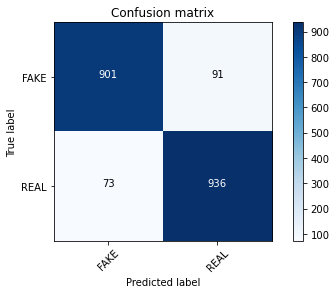

In [40]:
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [41]:
classifier.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Preprocess and transform datapoint text (true['text'][16888]) and try to predict it based on the model

In [43]:
review = re.sub('[^a-zA-Z]', ' ', true['Statement'][16888])
review = review.lower()
review = review.split()
    
review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
review = ' '.join(review)
review

'delhi high court caution aft adventur order contraven earlier hc judgment'

In [44]:
val = tfidf_v.transform([review]).toarray()

In [45]:
pd.DataFrame(val, columns=tfidf_v.get_feature_names())

,aadhaar,aaditya,aaj,aaj tak,aamir,aamir khan,aap,aap leader,aap mla,aarogya,...,youtub,yr,yr old,ysrcp,zealand,zee,zee news,zero,zindabad,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
classifier.predict(val)

array([1], dtype=int64)

### Saving model and TFIDF Vectorizer

In [49]:
import joblib

In [50]:
joblib.dump(classifier, 'model.pkl')

['model.pkl']

In [52]:
joblib.dump(tfidf_v, 'tfidfvect.pkl')

['tfidfvect.pkl']

### Load model and vectorizer and predict on previous preprocessed datapoint

In [53]:
joblib_model = joblib.load('model.pkl')

In [54]:
joblib_tfidfvect = joblib.load('tfidfvect.pkl')

In [55]:
val_pkl = joblib_tfidfvect.transform([review]).toarray()

In [56]:
joblib_model.predict(val_pkl)

array([1], dtype=int64)

### Save some datapoints for text random generation

In [57]:
frames_2 = [true.loc[0:10][:], fake.loc[0:10][:]]
df_2 = pd.concat(frames_2)

In [58]:
df_2.to_csv('random_dataset.csv', index=False)